In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import neattext.functions as nfx

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fast')

In [ ]:
df = pd.read_csv('D:/NLP_Texts/Files_csv_nlp/Top 500 Songs.csv')
df.head()

,title,description,appears on,artist,writers,producer,released,streak,position
0,Like a Rolling Stone,"""I wrote it. I didn't fail. It was straight,""�...",Highway 61 Revisited (Columbia),Bob Dylan,Dylan,Tom Wilson,"July, 1965",12 weeks,No. 2
1,(I Can't Get No) Satisfaction',"""It's the riff heard round the world,"" says St...",Out of Our Heads�(ABKCO),The Rolling Stones,"Mick Jagger, Keith Richards",Andrew Loog Oldham,"May, 1965",14 weeks,No. 1
2,Imagine,"John Lennon wrote ""Imagine,"" his greatest musi...",Imagine�(Capitol/Apple),John Lennon,John Lennon,"Lennon, Phil Spector, Yoko Ono","October, 1971",9 weeks,No. 3
3,What's Going On,"""What's Going On"" is an exquisite plea for pea...",What's Going On�(Tamla),Marvin Gaye,"Gaye, Renaldo Benson, Al Cleveland",Gaye�,"Feb, 1971",13 weeks,No. 2
4,Respect,"Otis Redding wrote ""Respect"" and recorded it f...",I Never Loved a Man the Way I Love You�(Atlantic),Aretha Franklin,Otis Redding,Jerry Wexler,"April, 1967",12 weeks,No. 1


In [ ]:
df.isnull().sum()

title            0
description      0
appears on       0
artist           0
writers          0
producer         0
released         0
streak           6
position       107
dtype: int64

In [ ]:
df = df.fillna('')

In [ ]:
df.isnull().sum()

title          0
description    0
appears on     0
artist         0
writers        0
producer       0
released       0
streak         0
position       0
dtype: int64

In [ ]:
df.head()

,title,description,appears on,artist,writers,producer,released,streak,position
0,Like a Rolling Stone,"""I wrote it. I didn't fail. It was straight,""�...",Highway 61 Revisited (Columbia),Bob Dylan,Dylan,Tom Wilson,"July, 1965",12 weeks,No. 2
1,(I Can't Get No) Satisfaction',"""It's the riff heard round the world,"" says St...",Out of Our Heads�(ABKCO),The Rolling Stones,"Mick Jagger, Keith Richards",Andrew Loog Oldham,"May, 1965",14 weeks,No. 1
2,Imagine,"John Lennon wrote ""Imagine,"" his greatest musi...",Imagine�(Capitol/Apple),John Lennon,John Lennon,"Lennon, Phil Spector, Yoko Ono","October, 1971",9 weeks,No. 3
3,What's Going On,"""What's Going On"" is an exquisite plea for pea...",What's Going On�(Tamla),Marvin Gaye,"Gaye, Renaldo Benson, Al Cleveland",Gaye�,"Feb, 1971",13 weeks,No. 2
4,Respect,"Otis Redding wrote ""Respect"" and recorded it f...",I Never Loved a Man the Way I Love You�(Atlantic),Aretha Franklin,Otis Redding,Jerry Wexler,"April, 1967",12 weeks,No. 1


In [ ]:
df.columns

Index(['title', 'description', 'appears on', 'artist', 'writers', 'producer',
       'released', 'streak', 'position'],
      dtype='object')

In [ ]:
df.drop(columns={'appears on', 'artist', 'writers', 'producer',
       'released', 'streak', 'position'},inplace=True)

In [ ]:
df.head()

,title,description
0,Like a Rolling Stone,"""I wrote it. I didn't fail. It was straight,""�..."
1,(I Can't Get No) Satisfaction',"""It's the riff heard round the world,"" says St..."
2,Imagine,"John Lennon wrote ""Imagine,"" his greatest musi..."
3,What's Going On,"""What's Going On"" is an exquisite plea for pea..."
4,Respect,"Otis Redding wrote ""Respect"" and recorded it f..."


### Text Cleaning and Preprocessing

In [ ]:
df['description']=df['description'].apply(nfx.remove_punctuations)
df['description']=df['description'].apply(nfx.remove_special_characters)
df['description']=df['description'].apply(nfx.remove_stopwords)
df['description']=df['description'].apply(nfx.remove_numbers)

### Applying subjectivity and polarity

In [ ]:
def getPolarity(txt):
    return TextBlob(txt).sentiment.polarity
def getSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

In [ ]:
df['Polarity']=df['description'].apply(getPolarity)
df['Subjectivity']= df['description'].apply(getSubjectivity)

In [ ]:
df.head()

,title,description,Polarity,Polarity_Scores,Subjectivity
0,Like a Rolling Stone,wrote didnt fail straightBob Dylansaid greates...,0.220000,Positive,0.500000
1,(I Can't Get No) Satisfaction',riff heard round world says Steve Van Zandt gu...,0.133333,Positive,0.533333
2,Imagine,John Lennon wrote Imagine greatest musical gif...,0.283333,Positive,0.450000
3,What's Going On,Whats Going exquisite plea peace Earth sung ma...,0.025000,Positive,0.325000
4,Respect,Otis Redding wrote Respect recorded Volt label...,0.083452,Positive,0.430529


### Adding sentiment Labels to the dataset

In [1]:
def getLabels(x):
    if x<0:
        return 'Negative'
    elif x==0:
        return 'Neutral'
    else:
        return 'Positive'

In [2]:
df['Polarity_Scores']=df['Polarity'].apply(getLabels)

NameError: ignored

In [ ]:
df.head()

In [ ]:
df.Polarity_Scores.unique()

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Sentimentic Analysis of Songs Description')
sns.countplot(df['Polarity_Scores'])
plt.show()

### Text analysis of the sentiments

In [ ]:
Pos = df[df.Polarity_Scores=='Positive']['description']
Pos_list = Pos.tolist()
Neg = df[df.Polarity_Scores=='Negative']['description']
Neg_list = Neg.tolist()
Neu = df[df.Polarity_Scores=='Neutral']['description']
Neu_list = Neu.tolist()

#### Tokening the lists into tokens

In [ ]:
Pos_tokens = [token for line in Pos_list for token in line.split()]
Neg_tokens = [token for line in Neg_list for token in line.split()]
Neu_tokens = [token for line in Neu_list for token in line.split()]

#### Counting the most common words in the tokens

In [ ]:
from collections import Counter
def count_most_common(docx,num=35):
    wordtokens = Counter(docx)
    mostcommon = wordtokens.most_common(num)
    result = dict(mostcommon)
    return result

In [ ]:
Pos_common = count_most_common(Pos_tokens)
Neg_common = count_most_common(Neg_tokens)
Neu_common = count_most_common(Neu_tokens)

#### Creating a dataframe to the most common with the count

In [ ]:
Pos_df = pd.DataFrame(Pos_common.items(),columns=['Pos_Songs','Pos_Scores'])
Pos_df.head()

,Pos_Songs,Pos_Scores
0,song,235
1,said,172
2,wrote,76
3,hit,64
4,like,60


In [ ]:
Neg_df = pd.DataFrame(Neg_common.items(),columns=['Neg_Songs','Neg_Scores'])
Neg_df.head()

,Neg_Songs,Neg_Scores
0,song,84
1,said,67
2,hit,35
3,like,29
4,single,26


In [ ]:
Neu_df = pd.DataFrame(Neu_common.items(),columns=['Neu_Songs','Neu_Scores'])
Neu_df.head()

,Neu_Songs,Neu_Scores
0,song,28
1,said,19
2,wrote,14
3,hit,9
4,McCartney,8


### Creating a word cloud of words

In [ ]:
from wordcloud import WordCloud
def plot_my_cloud(docx):
    plt.figure(figsize=(10,8))
    word_cloud = WordCloud().generate(docx)
    
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()


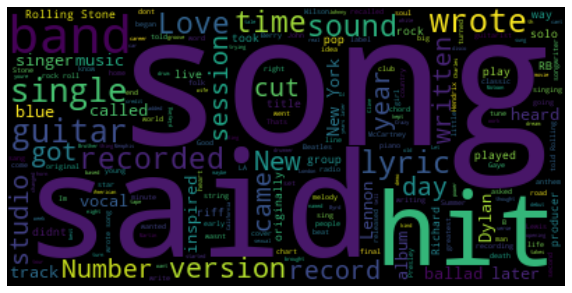

In [ ]:
Pos_cloud = " ".join(Pos_tokens)
plot_my_cloud(Pos_cloud)

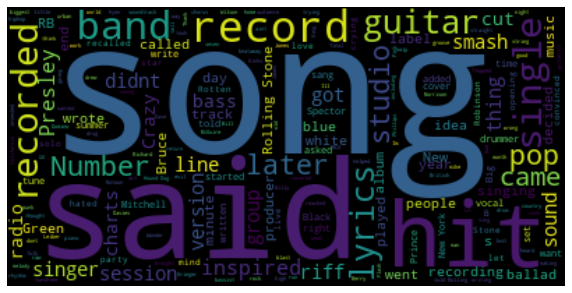

In [ ]:
Neg_cloud = " ".join(Neg_tokens)
plot_my_cloud(Neg_cloud)

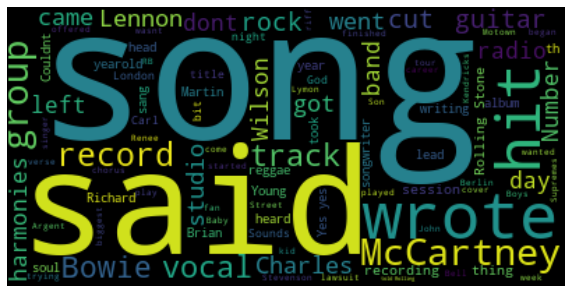

In [ ]:
Neu_cloud = " ".join(Neu_tokens)
plot_my_cloud(Neu_cloud)

In [ ]:
sns.barplot()

### Plotting of the Sentiments using the seaborn library

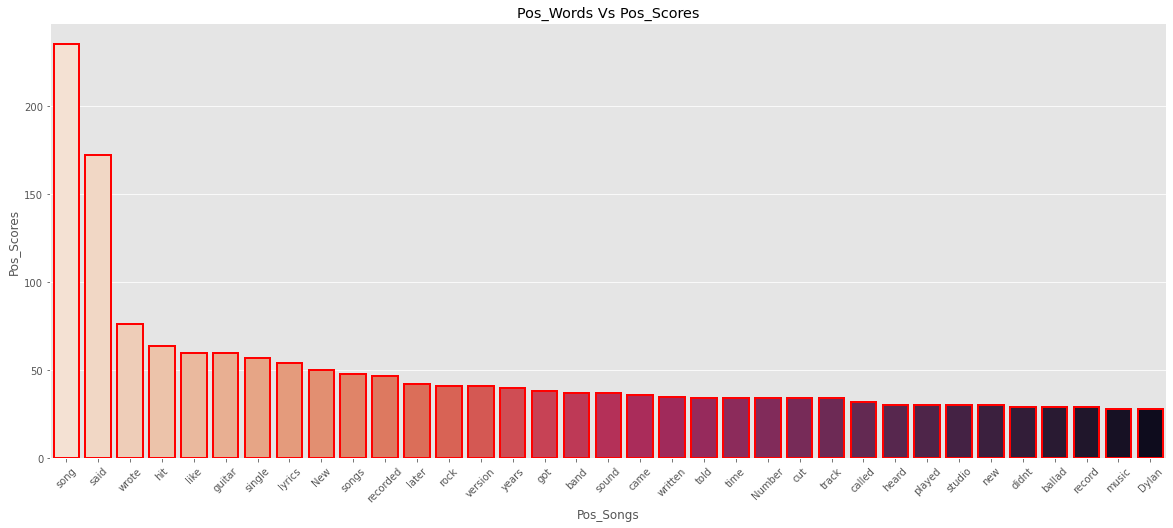

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Pos_Songs',y='Pos_Scores',data=Pos_df,palette='rocket_r',edgecolor='red',linewidth=2)
plt.title('Most Commonn ')
plt.xticks(rotation=45)
plt.show()

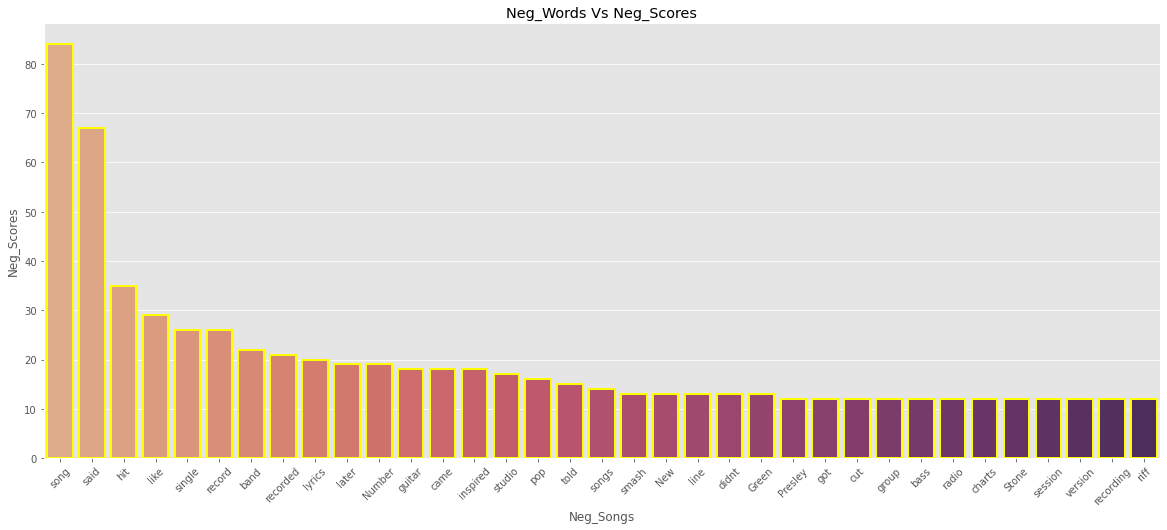

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Neg_Words Vs Neg_Scores')
sns.barplot(x='Neg_Songs',y='Neg_Scores',data=Neg_df,palette='flare',edgecolor='yellow',linewidth=2)
plt.xticks(rotation=45)
plt.show()

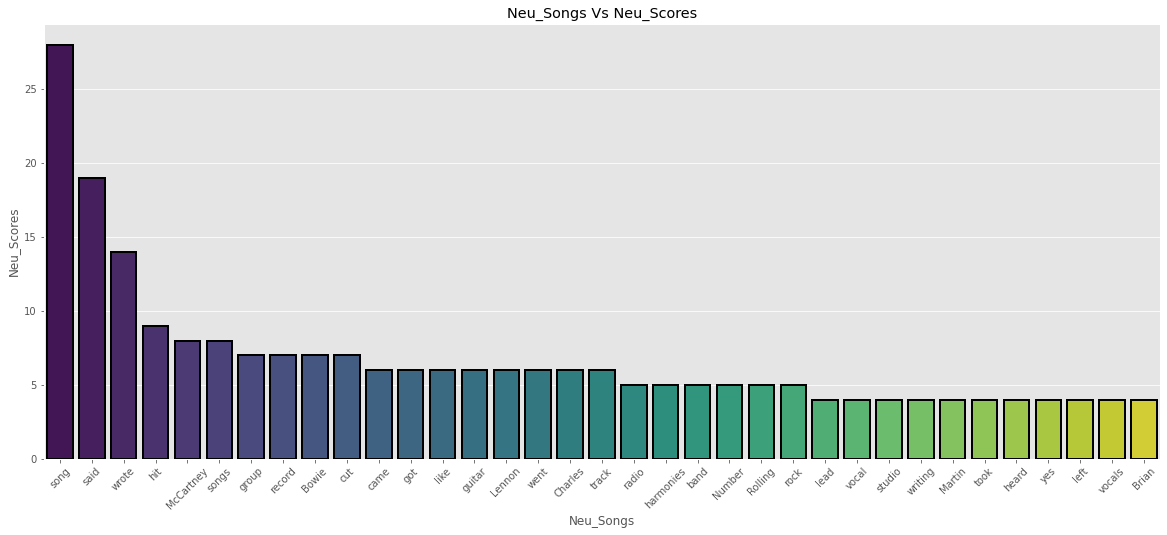

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Neu_Songs',y='Neu_Scores',data=Neu_df,palette='viridis',edgecolor='black',linewidth=2)
plt.title('Neu_Songs Vs Neu_Scores')
plt.xticks(rotation=45)
plt.show()

# Sentimentic Predictive Analysis of the Model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [ ]:
x=df['description']
clf = TfidfVectorizer(ngram_range=(1,3),max_features=1000)
x = clf.fit_transform(x)

In [ ]:
df['Num_Scores']= df.Polarity_Scores.map({'Positive':3,'Negative':2,'Neutral':1})
y=df['Num_Scores']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.35,random_state=0)

In [ ]:
model = LinearSVC()
model.fit(xtrain,ytrain)

LinearSVC()

In [ ]:
ypred = model.predict(xtest)
ypred

array([2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int64)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        19
           2       0.50      0.16      0.24        50
           3       0.62      0.93      0.75       106

    accuracy                           0.61       175
   macro avg       0.37      0.36      0.33       175
weighted avg       0.52      0.61      0.52       175



In [ ]:
print(confusion_matrix(ytest,ypred))

[[ 0  1 18]
 [ 0  8 42]
 [ 0  7 99]]


In [ ]:
print(accuracy_score(ytest,ypred))

0.6457142857142857


## Using a decison tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=4)

In [ ]:
#Training a model
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=4)

In [ ]:
ypred_1 = dtree.predict(xtest)
ypred_1

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int64)

In [ ]:
print(classification_report(ytest,ypred_1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        19
           2       0.75      0.18      0.29        50
           3       0.64      0.98      0.77       106

    accuracy                           0.65       175
   macro avg       0.46      0.39      0.35       175
weighted avg       0.60      0.65      0.55       175



In [ ]:
print(accuracy_score(ytest,ypred_1))

0.6457142857142857


In [ ]:
print(confusion_matrix(ytest,ypred_1))

[[  0   1  18]
 [  0   9  41]
 [  0   2 104]]


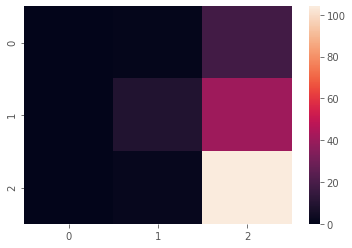

In [ ]:
matt = confusion_matrix(ytest,ypred_1)
sns.heatmap(data=matt)
plt.show()

# THE END #